Dummy Classifier ROC AUC=0.500
SGD Classifier ROC AUC=0.904
Gradient Boosting Classifier ROC AUC=0.951


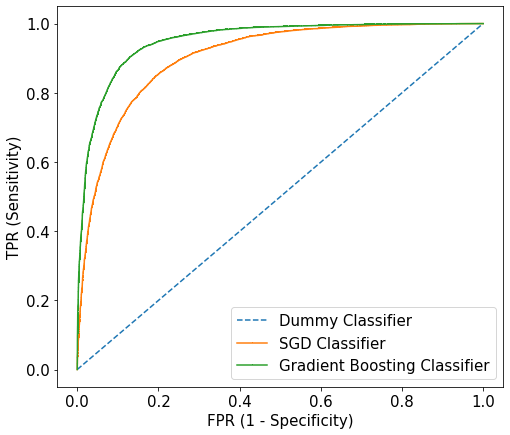

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
        
# 2개의 클래스로 구성된 데이터 세트 생성
X, y = make_classification(n_samples=50000, n_classes=2, random_state=50)

# 훈련 데이터, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

# 모델 생성 (Dummy 분류기, SGD, GBM)
dummy_clf = DummyClassifier(strategy='stratified', random_state=50)
SGD_clf = SGDClassifier(loss='log', alpha=0.0001, max_iter=1, random_state=50)
GBM_clf = GradientBoostingClassifier(random_state=50)

# ROC 곡선 생성 및 AUC 점수 출력 함수
def plot_ROC_AUC(model, model_name):
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)[:, 1]

    # AUC 점수 계산
    auc = roc_auc_score(y_test, preds)
    print('%s ROC AUC=%.3f' % (model_name, auc))

    # ROC 곡선을 위한 FPR, TPR 계산
    FPR, TPR, _ = roc_curve(y_test, preds)
    
    if model_name=='Dummy Classifier':
        plt.plot(FPR, TPR, linestyle='--', label=model_name)
    else:
        plt.plot(FPR, TPR, marker=',', label=model_name)

plt.rc('figure', figsize=(8,7))
plt.rc('font', size=15)

plot_ROC_AUC(dummy_clf, 'Dummy Classifier')
plot_ROC_AUC(SGD_clf, 'SGD Classifier')
plot_ROC_AUC(GBM_clf, 'Gradient Boosting Classifier')

plt.xlabel('FPR (1 - Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.legend()
plt.show()